In [47]:
!pip install torch_geometric

In [48]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(5, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 2)

    def forward(self, data):
        x, edge_index, edge_attr = data.edge_attr, data.edge_index, data.edge_attr
        x = self.conv1(edge_attr, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = global_mean_pool(x, data.batch)
        x = self.lin(x)
        return x


In [49]:
import numpy as np
target=[]
source=[]
edge_attr=[]
inp=np.array([[1,2,3],[10,20,30],[100,200,300]])
print(inp)
for row_idx, row in enumerate(inp):
    for col_idx, element in enumerate(row):
      target.append(row_idx+1)
      source.append(element)
      edge_attr.append(element)
edge_index=[target,source]
print(target)
print(source)
print(edge_index)
print(edge_attr)


'''
edge_attr[i] corresponds to the edge
between edge_index[0][i] and edge_index[1][i].
'''


[[  1   2   3]
 [ 10  20  30]
 [100 200 300]]
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[1, 2, 3, 10, 20, 30, 100, 200, 300]
[[1, 1, 1, 2, 2, 2, 3, 3, 3], [1, 2, 3, 10, 20, 30, 100, 200, 300]]
[1, 2, 3, 10, 20, 30, 100, 200, 300]


'\nedge_attr[i] corresponds to the edge \nbetween edge_index[0][i] and edge_index[1][i].\n'

Graph nodes: [0, 1, 2]


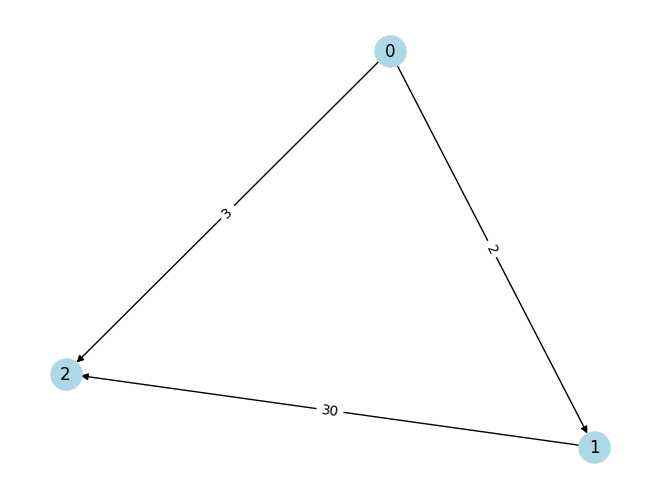

In [51]:
import networkx as nx
import random

# Create an empty graph
G = nx.DiGraph()

# Add three nodes with no node features
inp=np.array([[1,2,3],[10,20,30],[100,200,300]])
nr_obj=len(inp[0])
objs=list(range(nr_obj))
G.add_nodes_from(objs)

# Add fully connected edges with random edge features between 1 and 10
for i in objs:
    for j in objs:
      if i != j: #skip self edge
        if not (G.edges(j,i)): # skip already set edge
          edge_feature = inp[i][j]
          #edge_feature = random.randint(1, 10)
          #G.add_edge(j, i, edge_feature=edge_feature)
          G.add_edge(i, j, edge_feature=edge_feature)

# Print the graph
print("Graph nodes:", G.nodes())
#print("Graph edges:", G.edges(data=True))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')

# Draw edge labels
#edge_labels = nx.get_edge_attributes(G, 'edge_feature')
edge_labels = {(u, v): G[u][v]['edge_feature'] for u, v in G.edges()}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

Not used!

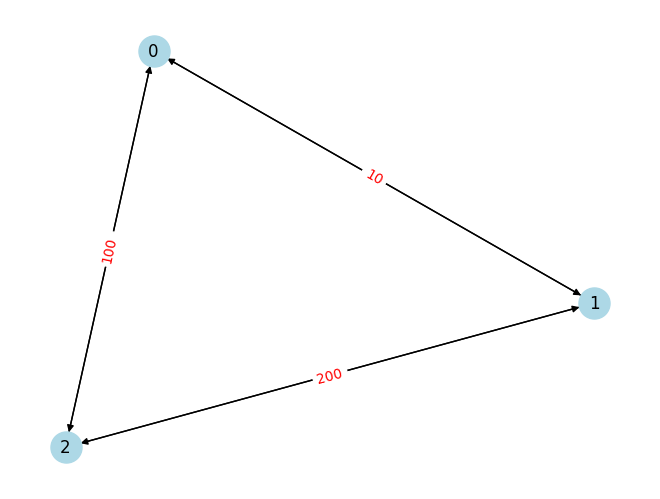

In [50]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a directed multigraph with no node features
G = nx.MultiDiGraph()
inp=np.array([[1,2,3],[10,20,30],[100,200,300]])

nr_obj=len(inp[0])
G.add_nodes_from(range(nr_obj))
# Add 5 nodes

# Add fully connected edges with random edge features (integers)
edge_labels = {}  # Store edge features for labeling

for i in range(nr_obj):
    for j in range(nr_obj):
        if i != j: #skip self edge
            #if not (G.edges(j,i)):
              #edge_feature = random.randint(1, 10)  # Replace with your desired range
              edge_feature = inp[i][j]  # Replace with your desired range
              G.add_edge(i, j, edge_feature=edge_feature)
              #G.add_edge(j, i, edge_feature=edge_feature)
              edge_labels[(i, j)] = edge_feature  # Store edge feature for labeling

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the graph using Matplotlib
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [15]:
num_nodes = 10  # number of nodes in your graph
edge_index = torch.combinations(torch.arange(num_nodes), r=2).t()  # fully connected
x = torch.ones((num_nodes, 1))  # node features
edge_attr = torch.randn((edge_index.size(1), 1))  # edge features
print()
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
         3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 3, 4, 5, 6, 7, 8, 9,
         4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 6, 7, 8, 9, 7, 8, 9, 8, 9, 9]])


In [14]:
print(data.edge_attr.shape)
print(data.edge_index.shape)

torch.Size([210, 1])
torch.Size([2, 210])


In [10]:
data.edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
          5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
          7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
         11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
         12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
         14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11

In [ ]:

def train(loader, model, optimizer, criterion):
    model.train()
    total_loss = 0
    for data in loader:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def test(loader, model):
    model.eval()
    correct = 0
    for data in loader:
        with torch.no_grad():
            pred = model(data).max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)